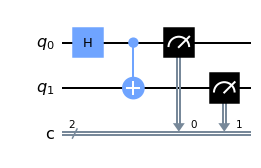

In [23]:
from qiskit import *
%matplotlib inline # Mandatory to print the circuit

qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qr, cr)

circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
# Same as
#circuit.measure(range(2), range(2)) 
#circuit.measure_all()

# Draw circuit
circuit.draw(output='mpl')

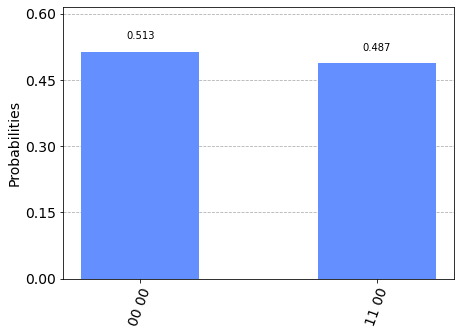

In [11]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()

from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

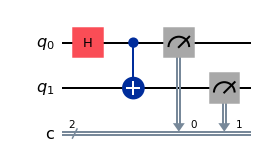

In [35]:
transpiled = transpile(circuit, seed_transpiler=13, optimization_level = 2)
transpiled.draw(output='mpl', style="iqx", fold=-1)

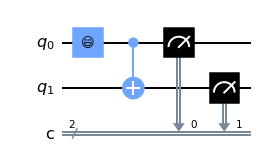

In [39]:
emoji_style = {
    "displaytext": {
        "h": "😄"
    },
}
transpiled.draw("mpl", style=emoji_style)

In [44]:
circuit.qasm(formatted=True, filename = "test_qasm.asm")

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



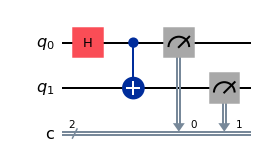

In [46]:
qc = QuantumCircuit.from_qasm_file("test_qasm.asm")
qc.draw("mpl", style="iqx")

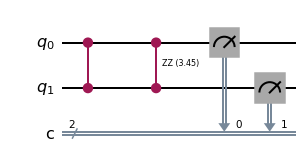

In [64]:
from qiskit.circuit.random import random_circuit

random_circ = random_circuit(2, 2, max_operands=2, measure=True)
random_circ.draw("mpl", style="iqx")

In [58]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
import qiskit.tools.jupyter

if not IBMQ.active_account():
    IBMQ.load_account()

all_providers = IBMQ.providers()

provider = all_providers[0] #IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [59]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 2 and 
                                       b.status().operational and not b.configuration().simulator))

In [66]:
backend

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

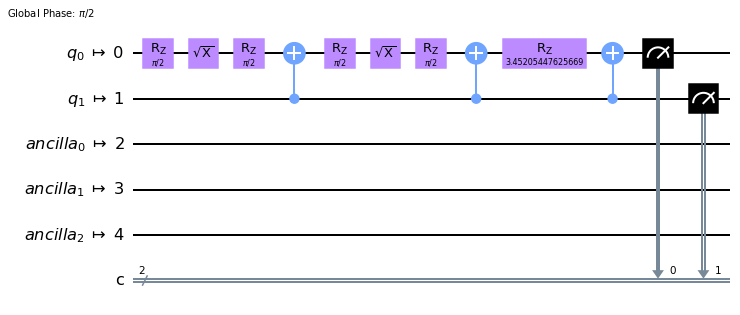

In [67]:
transpiled_circ = transpile(random_circ, backend)
transpiled_circ.draw("mpl", fold= -1)